## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

## Loading the data

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Data Analysis

<Axes: xlabel='Hours', ylabel='Scores'>

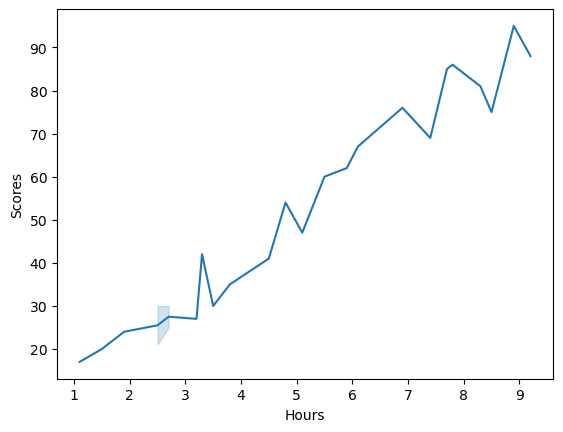

In [6]:
sns.lineplot(data = df, x = 'Hours', y = 'Scores')

- As the hours are increasing the way the scores are increasing 

<Axes: xlabel='Hours', ylabel='Scores'>

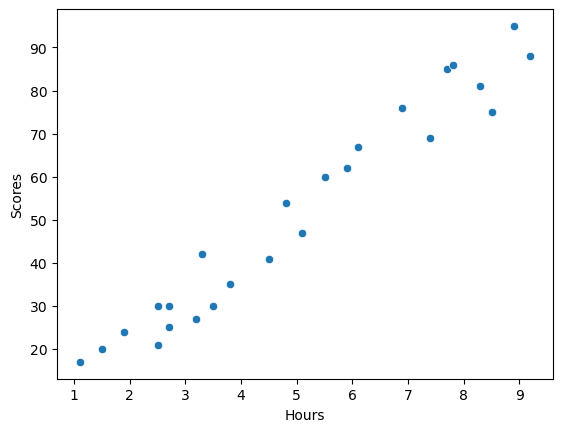

In [7]:
sns.scatterplot(data = df, x = 'Hours', y = 'Scores')

<Axes: >

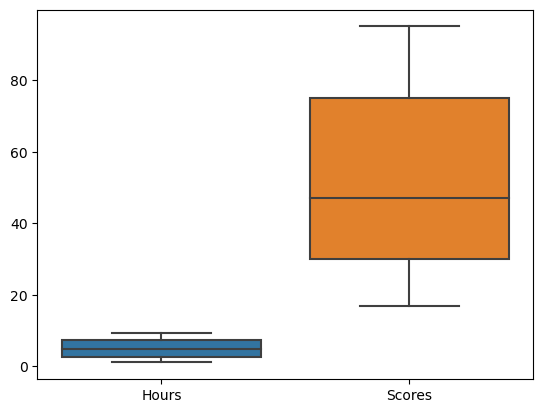

In [8]:
sns.boxplot(data = df)

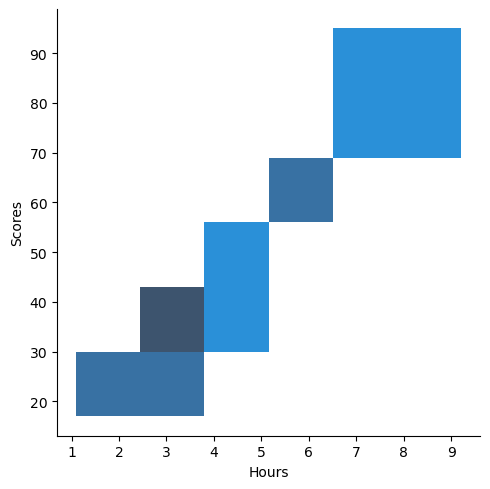

In [9]:
sns.displot(data = df, x = 'Hours',y = 'Scores')

# splitting the data

In [10]:
X = df[['Hours']]
y = df['Scores']

## Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.2, random_state = 100)

In [12]:
X_train.head()

,Hours
16,2.5
15,8.9
7,5.5
3,8.5
8,8.3


In [13]:
X_test.head()

,Hours
9,2.7
22,3.8
13,3.3
11,5.9
5,1.5


In [14]:
y_train.head()

16    30
15    95
7     60
3     75
8     81
Name: Scores, dtype: int64

In [15]:
y_test.head()

9     25
22    35
13    42
11    62
5     20
Name: Scores, dtype: int64

# Model Building

## Model - 1

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_predict = lr.predict(X_test)

In [18]:
df_pred = pd.DataFrame({'Test_data':y_test,'Predicted_data':y_predict})

In [19]:
df_pred

,Test_data,Predicted_data
9,25,32.580775
22,35,42.279079
13,42,37.870759
11,62,60.794023
5,20,22.000808
19,69,74.018982
23,76,69.610662
21,54,51.095719
6,88,89.888934
12,41,48.450727


<Axes: xlabel='Test_data', ylabel='Predicted_data'>

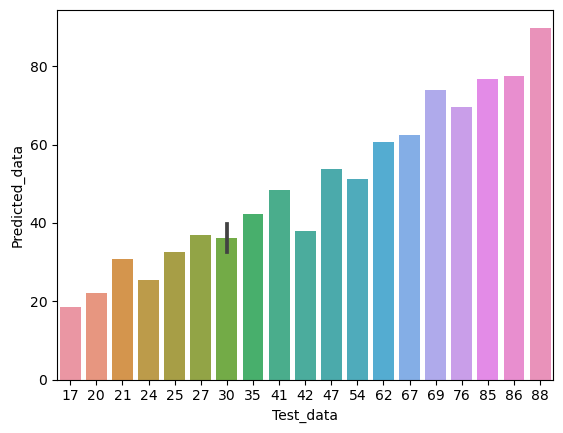

In [20]:
sns.barplot(x = 'Test_data',y = 'Predicted_data', data = df_pred)

In [21]:
print(f'Mean squared error {mean_squared_error(y_test,y_predict)}')
print(f'Mean Absolute error {mean_absolute_error(y_test,y_predict)}')

Mean squared error 38.63889740539876
Mean Absolute error 5.442245557350563


## Model - 2

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred = dtr.predict(X_test)

In [24]:
df_pred1 = pd.DataFrame({'Test_data':y_test,'Predicted_data':y_pred})

In [25]:
df_pred1

,Test_data,Predicted_data
9,25,30.0
22,35,30.0
13,42,30.0
11,62,60.0
5,20,30.0
19,69,81.0
23,76,60.0
21,54,60.0
6,88,95.0
12,41,60.0


<Axes: xlabel='Test_data', ylabel='Predicted_data'>

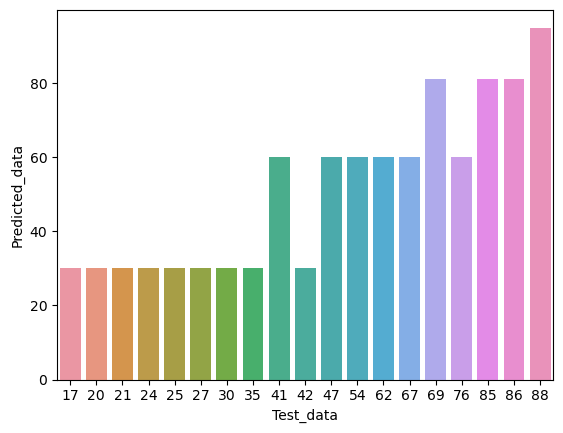

In [26]:
sns.barplot(x = 'Test_data',y = 'Predicted_data', data = df_pred1)

In [27]:
print(f'Mean squared error {mean_squared_error(y_test,y_pred)}')
print(f'Mean Absolute error {mean_absolute_error(y_test,y_pred)}')

Mean squared error 84.9
Mean Absolute error 7.7


## Model - 3

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
y_pred1 = rfr.predict(X_test)

In [30]:
df_pred2 = pd.DataFrame({'Test_data':y_test,'Predicted_data':y_pred1})

In [31]:
df_pred2

,Test_data,Predicted_data
9,25,39.87
22,35,39.87
13,42,39.87
11,62,67.80
5,20,39.87
19,69,79.94
23,76,67.80
21,54,51.57
6,88,90.90
12,41,51.57


<Axes: xlabel='Test_data', ylabel='Predicted_data'>

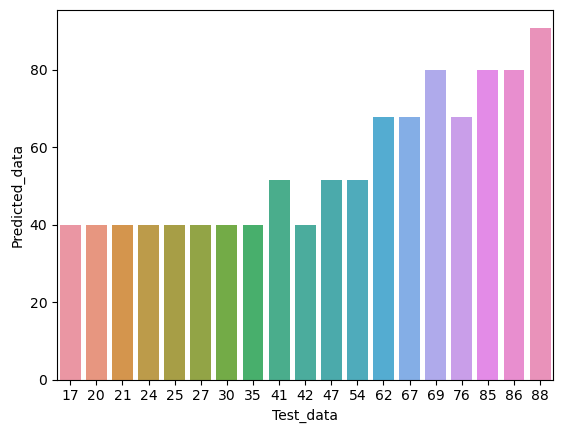

In [32]:
sns.barplot(x = 'Test_data',y = 'Predicted_data', data = df_pred2)

In [33]:
print(f'Mean squared error {mean_squared_error(y_test,y_pred1)}')
print(f'Mean Absolute error {mean_absolute_error(y_test,y_pred1)}')

Mean squared error 128.30422499999995
Mean Absolute error 9.464500000000001


- Here the Model - 1 is giving the lowest error

- Hence the Model - 1 is the best for the predictons.